In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset using pandas
data = pd.read_csv('../datasets/training_dataset.csv')
data_test = pd.read_csv('../datasets/testing_dataset.csv')

# Display the first few rows of the dataset for inspection
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
         time      open      high       low     close      volumeto
0  2018-01-01  13850.49  13921.53  12877.67  13444.88  1.057522e+09
1  2018-01-02  13444.88  15306.13  12934.16  14754.13  1.956783e+09
2  2018-01-03  14754.09  15435.01  14579.71  15156.62  1.604207e+09
3  2018-01-04  15156.49  15408.66  14244.67  15180.08  1.656715e+09
4  2018-01-05  15180.08  17126.95  14832.36  16954.78  2.283989e+09


In [4]:
X_features = ['open', "volumeto"]
target_column = 'close'

# Extract features (X_train) and target (y_train)
X_train = data[X_features]
y_train = data[target_column]

# Split the data into training and testing sets
X_test = data_test[X_features]
y_test = data_test[target_column]

# Display the shape of the training and testing sets
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1492, 2)
Shape of X_test: (334, 2)
Shape of y_train: (1492,)
Shape of y_test: (334,)


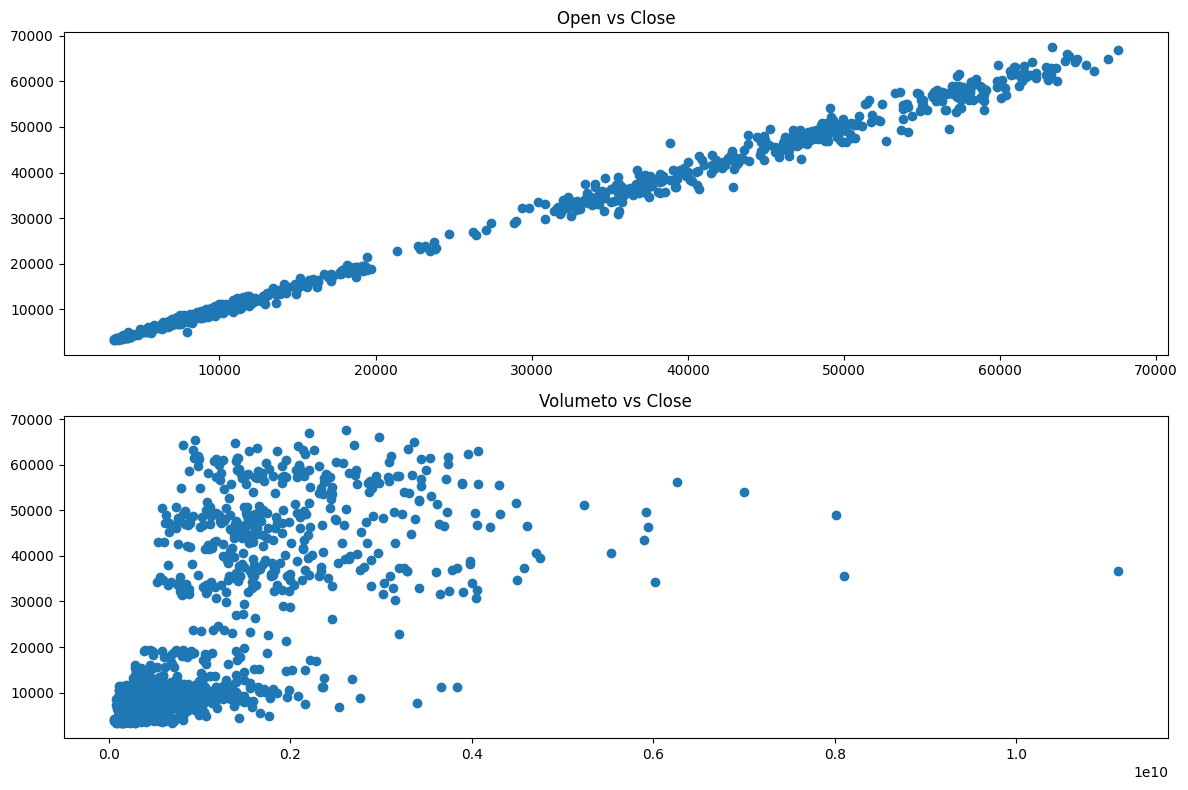

In [5]:
fig, axs = plt.subplots(2, figsize=(12, 8))

axs[0].scatter(X_train['open'], y_train)
axs[0].set_title('Open vs Close')

axs[1].scatter(X_train['volumeto'], y_train)
axs[1].set_title('Volumeto vs Close')

plt.tight_layout()
plt.show()

In [6]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train) 

LinearRegression()

In [7]:
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w}, b = {b}")

w = [ 1.00576030e+00 -1.73188213e-07], b = 73.82024166666088


Training MSE: 1009481.4383576598


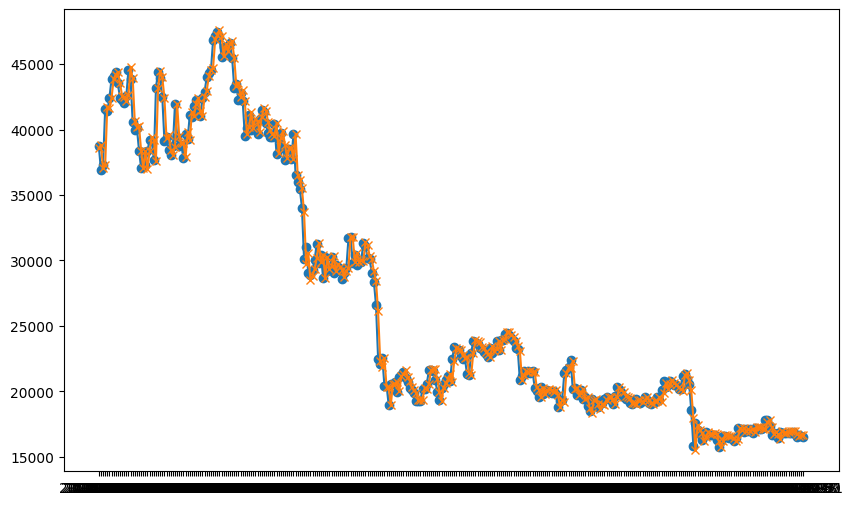

In [8]:
from sklearn.metrics import mean_squared_error

predictions = linear_model.predict(X_test).tolist()

time_column =data_test['time']

# Plotting the actual values
plt.figure(figsize=(10, 6))
plt.plot(time_column, y_test, label='Actual', marker='o')

# Plotting the predicted values
plt.plot(time_column, predictions, label='Predicted', marker='x')


train_mse = mean_squared_error(y_test, predictions)
print(f"Training MSE: {train_mse}")
plt.show()

Training MSE for quadratic polynomial: 1500605.360986253


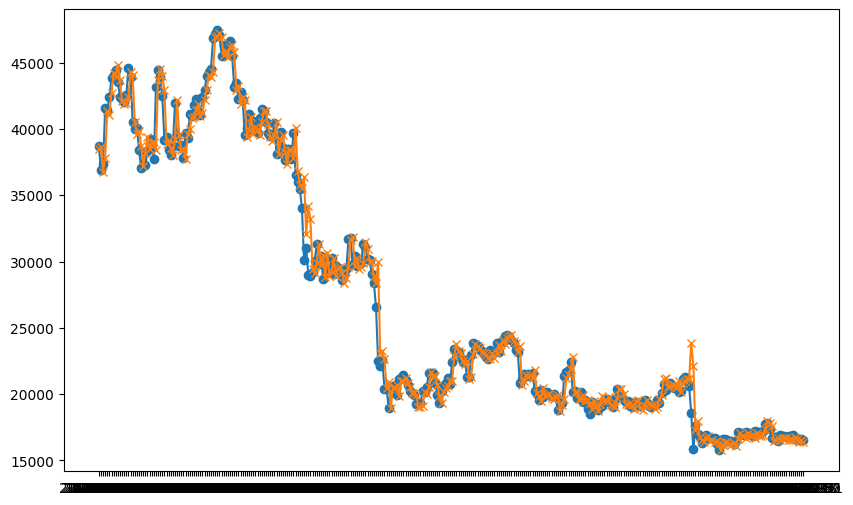

In [9]:
poly_features = PolynomialFeatures(2)
X_train_poly = poly_features.fit_transform(X_train)

# Create and fit the quadratic regression model
quadratic_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
quadratic_model.fit(X_train, y_train)

predictions = quadratic_model.predict(X_test).tolist()

time_column =data_test['time']

# Plotting the actual values
plt.figure(figsize=(10, 6))
plt.plot(time_column, y_test, label='Actual', marker='o')

# Plotting the predicted values
plt.plot(time_column, predictions, label='Predicted', marker='x')


train_mse = mean_squared_error(y_test, predictions)
print(f"Training MSE for quadratic polynomial: {train_mse}")
plt.show()

Training MSE for cubic polynomial: 88292724.78160386


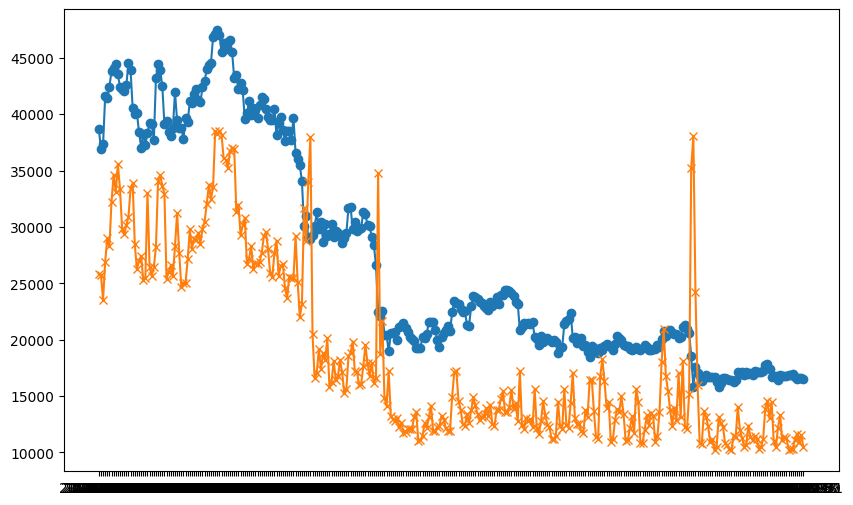

In [10]:
poly_features = PolynomialFeatures(3)
X_train_poly = poly_features.fit_transform(X_train)

# Create and fit the quadratic regression model
quadratic_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
quadratic_model.fit(X_train, y_train)

predictions = quadratic_model.predict(X_test).tolist()

time_column =data_test['time']

# Plotting the actual values
plt.figure(figsize=(10, 6))
plt.plot(time_column, y_test, label='Actual', marker='o')

# Plotting the predicted values
plt.plot(time_column, predictions, label='Predicted', marker='x')


train_mse = mean_squared_error(y_test, predictions)
print(f"Training MSE for cubic polynomial: {train_mse}")
plt.show()

Training MSE for degree 4 polynomial: 181477059.44970766


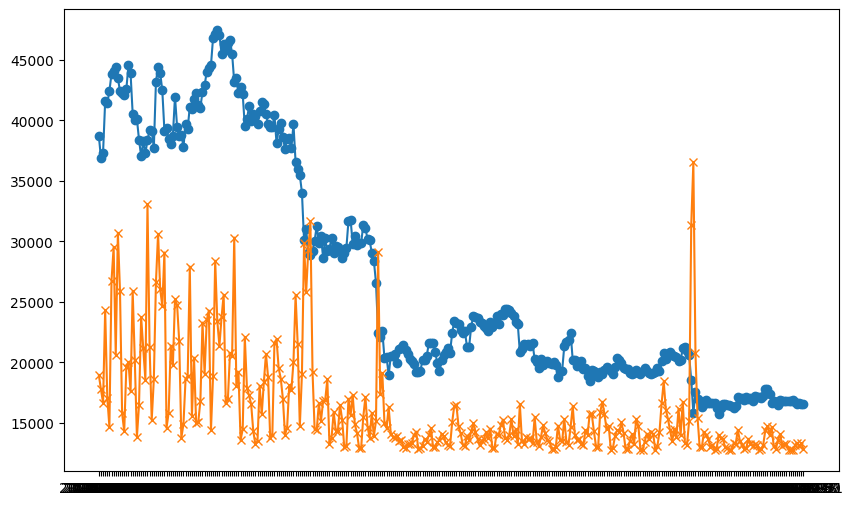

In [11]:
poly_features = PolynomialFeatures(4)
X_train_poly = poly_features.fit_transform(X_train)

# Create and fit the quadratic regression model
quadratic_model = make_pipeline(PolynomialFeatures(4), LinearRegression())
quadratic_model.fit(X_train, y_train)

predictions = quadratic_model.predict(X_test).tolist()

time_column =data_test['time']

# Plotting the actual values
plt.figure(figsize=(10, 6))
plt.plot(time_column, y_test, label='Actual', marker='o')

# Plotting the predicted values
plt.plot(time_column, predictions, label='Predicted', marker='x')


train_mse = mean_squared_error(y_test, predictions)
print(f"Training MSE for degree 4 polynomial: {train_mse}")
plt.show()